In [3]:
from perfectswish.object_detection.detect_objects import *
import cv2
import matplotlib.pyplot as plt

In [4]:
from perfectswish.image_transformation.gui_crop import *

In [5]:
balls_image = cv2.imread(r"detect_objects_test_images\cue_six_balls_and_free.jpg")
rect = get_camera_rect(balls_image)

In [6]:
new_rect = [53, 926, 26, 40, 1905, 81, 1833, 1001]
print(new_rect)
board_transformed = transform_board(balls_image, new_rect)

[53, 926, 26, 40, 1905, 81, 1833, 1001]


In [7]:
def show_im(img):
    # displays the image using matplotlib
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()

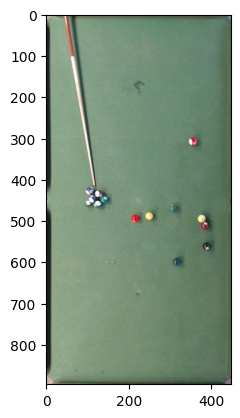

True

In [8]:
show_im(board_transformed)

# save board_transformed as an image:
cv2.imwrite("board_transformed.jpg", board_transformed)

In [9]:
rgb = cv2.cvtColor(board_transformed, cv2.COLOR_BGR2RGB)
rgb = board_transformed
grayscale = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# save grayscale as an image:
cv2.imwrite("grayscale.jpg", grayscale)

True

### Trial and error with stuff


### Template matching with grayscale image

In [10]:
def template_matching(image, template, n=10, threshold=0.8):
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    show_im(res)
    cv2.imwrite("res.jpg", res)
    loc = np.where(res >= threshold)
    return loc


def template_matching_map(image, template):
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    return res

### using a random ball as a template:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


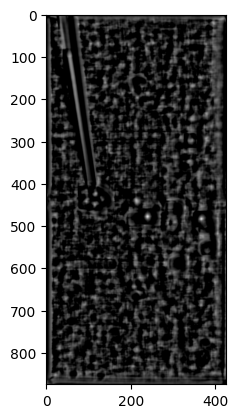

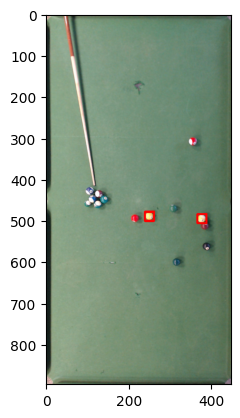

In [11]:
ball_template = cv2.imread(r"balls_for_template_matching\yellow_ball_template_no_bg.jpg")
ball_template = cv2.cvtColor(ball_template, cv2.COLOR_BGR2GRAY)
located_balls = template_matching(grayscale, ball_template, threshold=0.8)
cc_image = rgb.copy()
for pt in zip(*located_balls[::-1]):
    cv2.rectangle(cc_image, pt, (pt[0] + ball_template.shape[1], pt[1] + ball_template.shape[0]), (0, 0, 255), 2)

show_im(cc_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


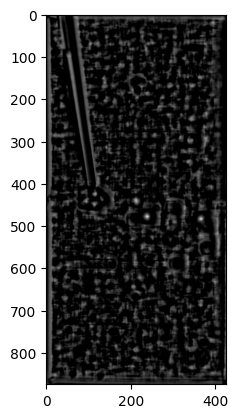

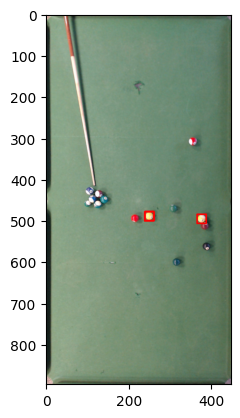

In [12]:
ball_template = cv2.imread(r"balls_for_template_matching\generic_ball.jpg")
ball_template = cv2.cvtColor(ball_template, cv2.COLOR_BGR2GRAY)
located_balls = template_matching(grayscale, ball_template, threshold=0.8)
cc_image = rgb.copy()
for pt in zip(*located_balls[::-1]):
    cv2.rectangle(cc_image, pt, (pt[0] + ball_template.shape[1], pt[1] + ball_template.shape[0]), (0, 0, 255), 2)

show_im(cc_image)

### Pattern matching with gradient of image

In [13]:
# Erode and dilate the image:
def erosion_dilation(image, erode_size, dilate_size):
    kernel = np.ones((erode_size, erode_size), np.uint8)
    eroded = cv2.erode(image, kernel, iterations=1)
    kernel = np.ones((dilate_size, dilate_size), np.uint8)
    dilated = cv2.dilate(eroded, kernel, iterations=1)
    return dilated


def dilation_erosion(image, dilate_size, erode_size):
    kernel = np.ones((dilate_size, dilate_size), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((erode_size, erode_size), np.uint8)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    return eroded

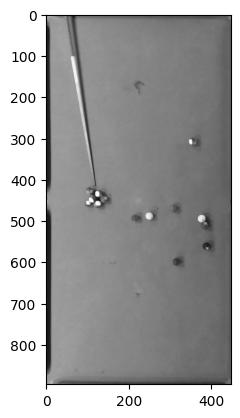

In [14]:
# Erode and dilate the grayscale image:

erisioned_dilated_image = erosion_dilation(grayscale, 5, 5)
erisioned_dilated_image = erosion_dilation(erisioned_dilated_image, 5, 5)
erisioned_dilated_image = erosion_dilation(erisioned_dilated_image, 5, 5)

show_im(erisioned_dilated_image)

### Threshold on gradient

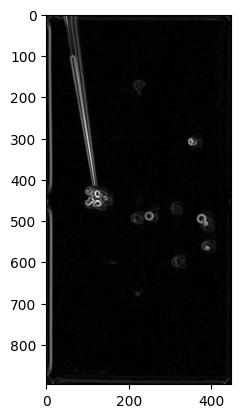

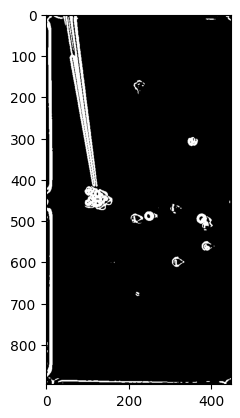

True

In [15]:

# Sobel gradient
to_sobel = cv2.blur(grayscale, (5, 5))
sobelx = cv2.Sobel(to_sobel, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(to_sobel, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.sqrt(sobelx ** 2 + sobely ** 2)
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
show_im(sobel)
# Threshold at 50:
_, sobel_threshold = cv2.threshold(sobel, 30, 255, cv2.THRESH_BINARY)
show_im(sobel_threshold)
cv2.imwrite("sobel_threshold.jpg", sobel_threshold)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


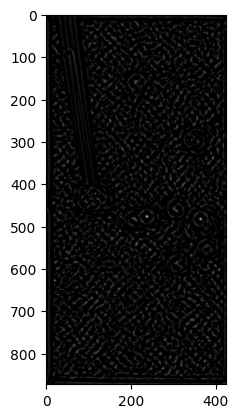

(array([347, 475, 475, 476, 476, 476, 476, 477, 477, 477, 477, 477, 478,
       478, 478, 478, 478, 479, 479, 479, 482, 482, 482, 482, 483, 483,
       483, 483, 484, 484, 484, 484, 484, 485, 485, 485, 628, 800],
      dtype=int64), array([226, 237, 238, 236, 237, 238, 239, 236, 237, 238, 239, 240, 236,
       237, 238, 239, 240, 237, 238, 239, 363, 364, 365, 366, 363, 364,
       365, 366, 363, 364, 365, 366, 367, 364, 365, 366,  20, 270],
      dtype=int64))


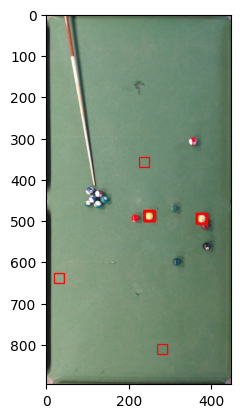

In [16]:
ball_template = cv2.imread(r"balls_for_template_matching\sobel_ball.jpg")
ball_template = cv2.cvtColor(ball_template, cv2.COLOR_BGR2GRAY)
located_balls = template_matching(sobel, ball_template, threshold=0.4)
cc_image = rgb.copy()
for pt in zip(*located_balls[::-1]):
    cv2.rectangle(cc_image, pt, (pt[0] + ball_template.shape[1], pt[1] + ball_template.shape[0]), (0, 0, 255), 2)
print(located_balls)
show_im(cc_image)

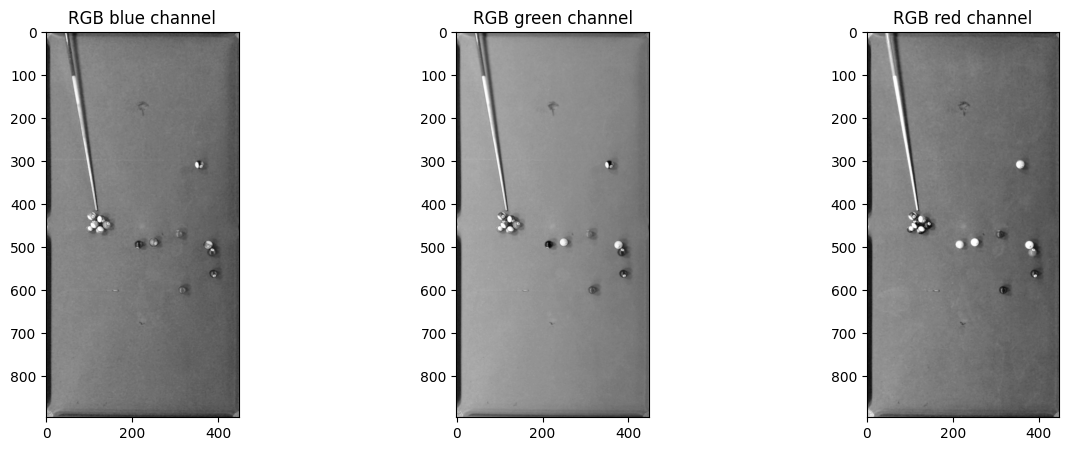

In [17]:
# Print every channel seperately, and add a title to each image:
def show_channels(image, title):
    b, g, r = cv2.split(image)
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(b, cmap="gray")
    axs[0].set_title(title + " blue channel")
    axs[1].imshow(g, cmap="gray")
    axs[1].set_title(title + " green channel")
    axs[2].imshow(r, cmap="gray")
    axs[2].set_title(title + " red channel")
    plt.show()


show_channels(rgb, "RGB")

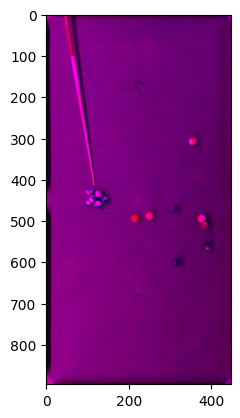

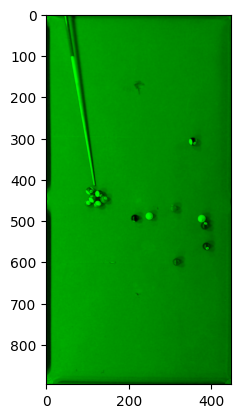

In [18]:
# Set the green channel to zero:
rgb_no_green = rgb.copy()
rgb_no_green[:, :, 1] = 0
show_im(rgb_no_green)

rgb_only_green = rgb.copy()
rgb_only_green[:, :, 0] = 0
rgb_only_green[:, :, 2] = 0
show_im(rgb_only_green)

### Gradient of red and blue image

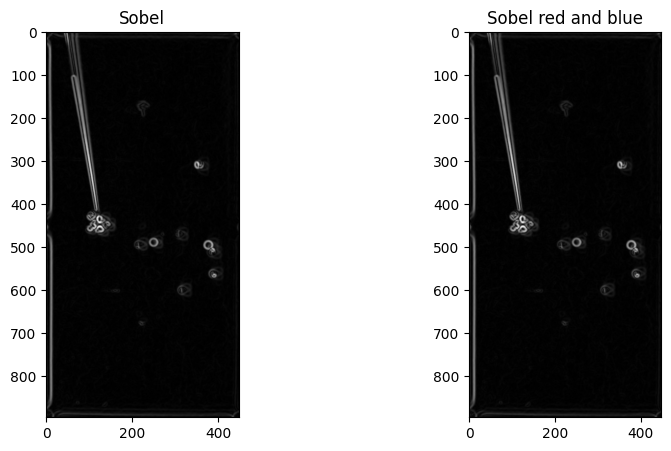

In [19]:

# Generate gradient of the image:
to_sobel = cv2.cvtColor(rgb_no_green, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(to_sobel, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(to_sobel, cv2.CV_64F, 0, 1, ksize=5)
sobel_rb = np.sqrt(sobelx ** 2 + sobely ** 2)  # Gradient magnitude
sobel_rb = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# Comparing sobel and sobel rb side by side:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(sobel, cmap="gray")
axs[0].set_title("Sobel")
axs[1].imshow(sobel_rb, cmap="gray")
axs[1].set_title("Sobel red and blue")
plt.show()


### HSV Attempt:

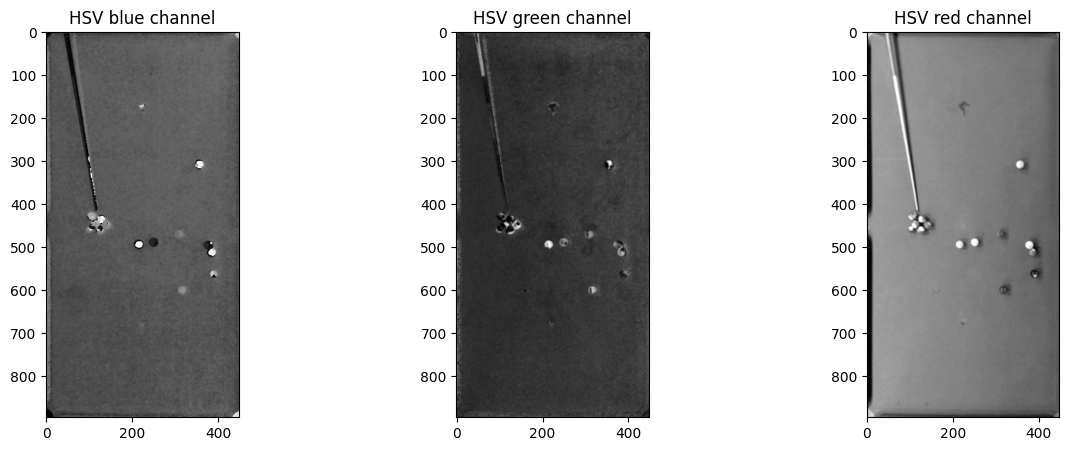

In [20]:
rgb_blurred = cv2.GaussianBlur(rgb, (5, 5), 0)
hsv = cv2.cvtColor(rgb_blurred, cv2.COLOR_BGR2HSV)
show_channels(hsv, "HSV")

### Gradient of the saturation channel

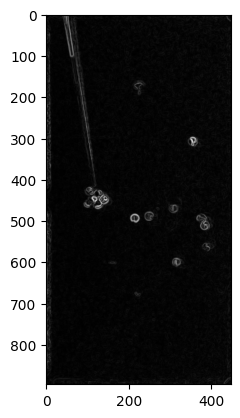

In [21]:
# Generate gradient of the image:
to_sobel = hsv[:, :, 1]
sobelx = cv2.Sobel(to_sobel, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(to_sobel, cv2.CV_64F, 0, 1, ksize=5)
sobel_s = np.sqrt(sobelx ** 2 + sobely ** 2)  # Gradient magnitude
sobel_s = cv2.normalize(sobel_s, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
show_im(sobel_s)

### Gradient of the value channel

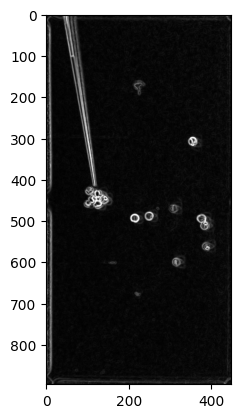

True

In [22]:
# Generate gradient of the image:
to_sobel = hsv[:, :, 2]
sobelx = cv2.Sobel(to_sobel, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(to_sobel, cv2.CV_64F, 0, 1, ksize=5)
sobel_v = np.sqrt(sobelx ** 2 + sobely ** 2)  # Gradient magnitude
sobel_v = cv2.normalize(sobel_v, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# for each pixel in v and s take the min value between the sum of the two and 255:
sobel_vs = np.minimum(sobel_v.astype(np.uint16) + sobel_s.astype(np.uint16), 255).astype(np.uint8)
show_im(sobel_vs)
# sobel_vs = cv2.normalize(sobel_v+sobel_s, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite("sobel_vs.jpg", sobel_vs)


### looks promising!
### ill try to gamma correct the image and then threshold it

In [23]:
def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

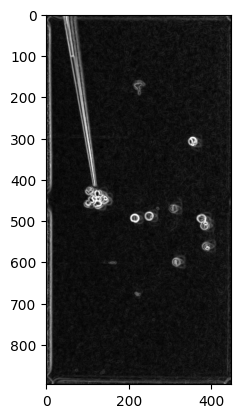

In [24]:
gamma_corrected = gamma_correction(sobel_vs, gamma=1.3)
show_im(gamma_corrected)

### clean the cell using bilateral filter, then erosion and dilation

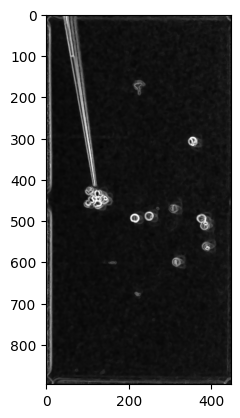

In [25]:
bilat = cv2.bilateralFilter(gamma_corrected, 9, 10, 75)
show_im(bilat)

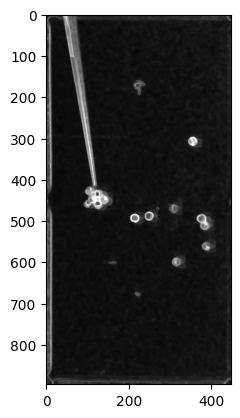

True

In [26]:
# close image:
dilated_erosioned_image = dilation_erosion(bilat, 5, 5)
show_im(dilated_erosioned_image)
cv2.imwrite("dilated_erosioned_image.jpg", dilated_erosioned_image)

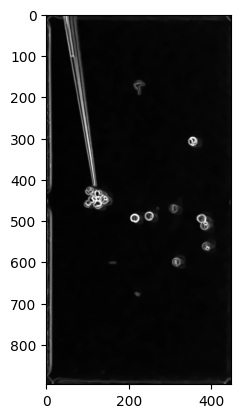

True

In [43]:
# denoise the image:
denoised = cv2.fastNlMeansDenoising(bilat, None, 10, 7, 21)
denoised = gamma_correction(denoised, gamma=0.8)
denoised = cv2.normalize(denoised, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
show_im(denoised)
cv2.imwrite("denoised.jpg", denoised)

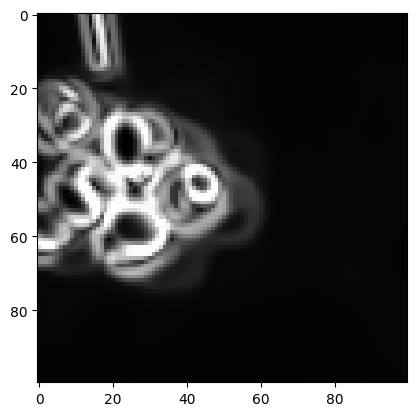

In [44]:
show_im(denoised[400:500, 100:200])

In [28]:
# threshold the image:
_, mask_image = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


### Template matching with gamma_corrected image 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


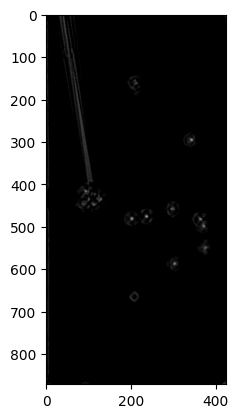

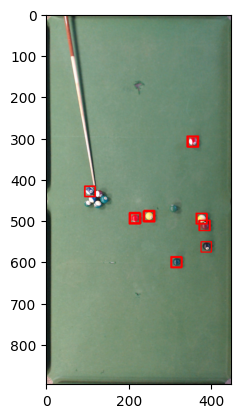

True

In [29]:
sobel_ball_template = cv2.imread(r"balls_for_template_matching\better_sobel_ball.jpg")
sobel_ball_template = cv2.cvtColor(sobel_ball_template, cv2.COLOR_BGR2GRAY)
located_balls = template_matching(mask_image, sobel_ball_template, threshold=0.5)
cc_image = rgb.copy()
for pt in zip(*located_balls[::-1]):
    cv2.rectangle(cc_image, pt, (pt[0] + sobel_ball_template.shape[1], pt[1] + sobel_ball_template.shape[0]),
                  (0, 0, 255), 2)
show_im(cc_image)
cv2.imwrite("sobel_ball_template_matching.jpg", cc_image)

### Almost works, now ill try to do another template matching, on the template matching map, because i see potential


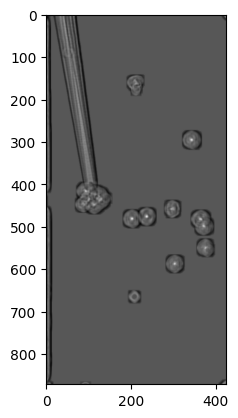

True

In [30]:
ball_template = cv2.imread(r"balls_for_template_matching\better_sobel_ball.jpg")
ball_template = cv2.cvtColor(ball_template, cv2.COLOR_BGR2GRAY)
match_map = template_matching_map(mask_image, ball_template)
match_map = cv2.normalize(match_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
show_im(match_map)
cv2.imwrite("match_map.jpg", match_map)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


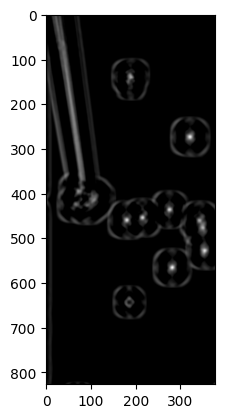

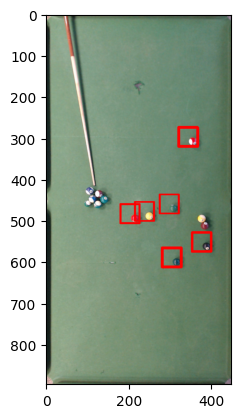

True

In [31]:
correlation_ball_template = cv2.imread(r"balls_for_template_matching\correlation_ball_unclean.jpg")
correlation_ball_template = cv2.cvtColor(correlation_ball_template, cv2.COLOR_BGR2GRAY)
located_balls = template_matching(match_map, correlation_ball_template, threshold=0.8)
cc_image = rgb.copy()
for pt in zip(*located_balls[::-1]):
    cv2.rectangle(cc_image, pt,
                  (pt[0] + correlation_ball_template.shape[1], pt[1] + correlation_ball_template.shape[0]), (0, 0, 255),
                  2)
show_im(cc_image)
cv2.imwrite("correlation_ball_template_matching.jpg", cc_image)

### Sadly, the correlation ball template matching is not working.
## New approach, hough circles!


In [32]:
def hough_circles_grayscale(image, min_radius, max_radius, min_dist, param1, param2): # change it from a threshold to take the top n circles
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT_ALT, 1.5, min_dist, param1=param1, param2=param2,
                               minRadius=min_radius, maxRadius=max_radius)
    return circles

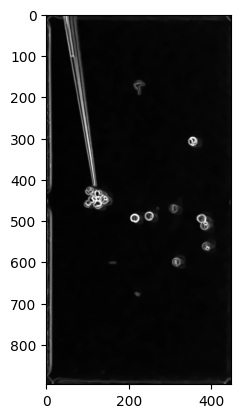

[[[315.       600.        11.004701]
  [249.       489.        11.168138]
  [214.5      493.5       11.022977]
  [309.       471.        11.580699]
  [384.       511.5       11.651408]
  [126.       457.5       13.447401]
  [376.5      496.5       12.136917]
  [139.5      450.        11.390883]
  [355.5      307.5       11.306407]
  [105.       427.5       11.663316]
  [387.       562.5       11.237053]]]


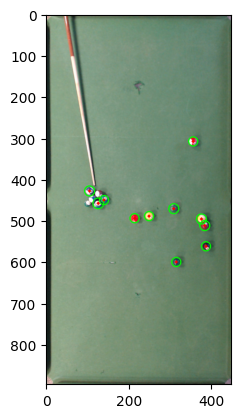

In [33]:
to_hough = denoised.copy()
# threshold the image:
# _, to_hough = cv2.threshold(to_hough, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_im(to_hough)
to_hough = cv2.GaussianBlur(to_hough, (5, 5), 0)
circles = hough_circles_grayscale(to_hough, 10, 15, 8, 50,
                                  0.1)  # I have no idea whats the best values for the parameters
to_draw_on = rgb.copy()
print(circles)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # draw the outer circle
        cv2.circle(to_draw_on, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # draw the center of the circle
        cv2.circle(to_draw_on, (i[0], i[1]), 2, (0, 0, 255), 3)
show_im(to_draw_on)

### Nice! Now ill write everything as one function and test it on some images

In [34]:
def calc_sobel_vs(image):
    # Generate gradient of the image:
    to_sobel = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    to_sobel = to_sobel[:, :, 1]
    sobelx = cv2.Sobel(to_sobel, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(to_sobel, cv2.CV_64F, 0, 1, ksize=5)
    sobel_s = np.sqrt(sobelx ** 2 + sobely ** 2)  # Gradient magnitude
    sobel_s = cv2.normalize(sobel_s, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    to_sobel = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    to_sobel = to_sobel[:, :, 2]
    sobelx = cv2.Sobel(to_sobel, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(to_sobel, cv2.CV_64F, 0, 1, ksize=5)
    sobel_v = np.sqrt(sobelx ** 2 + sobely ** 2)  # Gradient magnitude
    sobel_v = cv2.normalize(sobel_v, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    sobel_vs = np.minimum(sobel_v.astype(np.uint16) + sobel_s.astype(np.uint16), 255).astype(np.uint8)
    return sobel_vs


def denoise(image):
    # denoised = cv2.bilateralFilter(image, 9, 10, 75)
    denoised = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)
    # denoised = gamma_correction(denoised, gamma=1.2)
    # denoised = cv2.GaussianBlur(denoised, (5, 5), 0)
    return denoised


def find_balls(cropped_image, return_intermediates=False):
    '''' 
    cropped_image: the image of the board, cropped to the board only
    returns:
    '''
    # Blur the image:
    rgb_blurred = cv2.GaussianBlur(cropped_image, (5, 5), 0)
    # get the gradient of the saturation channel and the value channel:
    sobel_vs = calc_sobel_vs(rgb_blurred)
    # denoise the image:
    denoised = denoise(sobel_vs)
    circles = hough_circles_grayscale(denoised, 10, 15, 8, 50,
                                      0.1)  # TODO tamper with parameters
    # return only the xy coordinates of the circles:
    if circles is not None:
        circles = circles[0, :][:, :2]
    
    if return_intermediates:
        # Return the intermediate results and the final circles
        return rgb_blurred, sobel_vs, denoised, circles
    else:
        return circles


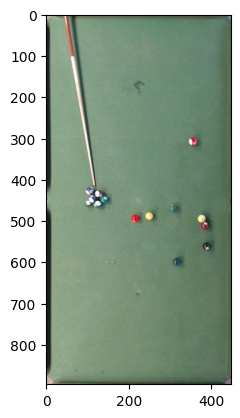

[249. 489.]
[214.5 493.5]
[384.  511.5]
[376.5 496.5]
[355.5 307.5]
[315.  598.5]


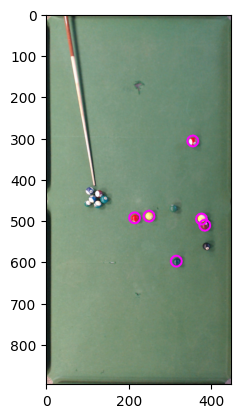

In [35]:
rgb = cv2.imread(r"detect_objects_test_images\cue_six_balls_and_free.jpg")
new_rect = [53, 926, 26, 40, 1905, 81, 1833, 1001]
rgb = transform_board(rgb, new_rect)

show_im(rgb)
balls = find_balls(rgb)
if balls is not None:
    for i in balls:
        print(i)
        cv2.circle(rgb, (int(i[0]), int(i[1])), 13, (255, 0, 255), 3)
show_im(rgb)

### Testing the function on a video

In [36]:
def draw_balls(frame, balls):
    for i in balls:
        cv2.circle(frame, (int(i[0]), int(i[1])), 13, (255, 0, 255), 3)
    return frame

In [37]:
def process_video(input_video_path: str, output_video_path: str, rect, show_intermediates=False) -> None:
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    if show_intermediates:
        # Adjust the output width to fit all intermediate steps side by side
        output_width = (112 * 4) * 4
    else:
        output_width = 112 * 4
    output_height = 224 * 4
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (output_width, output_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Crop the image
        cropped_image = transform_board(frame, rect)

        if show_intermediates:
            # Find balls in the cropped image and get intermediate results
            rgb_blurred, sobel_vs, denoised, found_balls = find_balls(cropped_image, return_intermediates=True)
            
            # Resize all images to the same size for concatenation
            resized_cropped = cv2.resize(cropped_image, (112 * 4, 224 * 4))
            resized_blurred = cv2.resize(rgb_blurred, (112 * 4, 224 * 4))
            resized_sobel_vs = cv2.resize(sobel_vs, (112 * 4, 224 * 4))
            resized_denoised = cv2.resize(denoised, (112 * 4, 224 * 4))

            # Convert grayscale images to BGR for concatenation
            resized_sobel_vs = cv2.cvtColor(resized_sobel_vs, cv2.COLOR_GRAY2BGR)
            resized_denoised = cv2.cvtColor(resized_denoised, cv2.COLOR_GRAY2BGR)

            # Find balls in the cropped image without intermediate results
            found_balls = find_balls(cropped_image)
            
            # Concatenate images side by side
            concatenated_frame = cv2.hconcat([resized_cropped, resized_blurred, resized_sobel_vs, resized_denoised])
            
        else:
            # Find balls in the cropped image without intermediate results
            found_balls = find_balls(cropped_image)
            
            # Resize the cropped image for output
            concatenated_frame = cv2.resize(cropped_image, (112 * 4, 224 * 4))

        # Draw balls on the frame to be saved
        if found_balls is not None:
            frame_with_balls = draw_balls(cropped_image, found_balls)
        else:
            frame_with_balls = cropped_image

        if show_intermediates:
            # Write the concatenated frame to the output video
            out.write(concatenated_frame)
        else:
            # Write the frame with balls to the output video
            out.write(frame_with_balls)

    # Release everything when done
    cap.release()
    out.release()
    cv2.destroyAllWindows()



# Get first frame from video to calculate the rect  

In [1]:
import cv2

video_path = r"detect_objects_test_images\test_video.avi"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
show_im(frame)
cap.release()

NameError: name 'show_im' is not defined

In [40]:
new_rect = [61, 944, 91, 68, 1860, 38, 1890, 937]
print(new_rect)
process_video(r"detect_objects_test_images\cropped_test_video_short.mp4", "output_video_12_sec.avi", new_rect, show_intermediates=True)

[61, 944, 91, 68, 1860, 38, 1890, 937]


In [56]:
# Testing how to save videos

image_with_balls = cv2.imread(r"detect_objects_test_images\cue_six_balls_and_free.jpg")
img = image_with_balls[200:300, 550:750]
vecs = img.reshape((-1, 3)).tolist()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(vecs)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
kmeans.cluster_centers_


array([[104.93335097, 126.85739222,  97.15498545],
       [224.29562044, 216.38686131, 237.13321168],
       [ 66.21023766,  35.95246801, 216.7202925 ]])

### Schtobers code:

In [ ]:
erisioned_dilated_image = erosion_dilation(mask_image, 3, 3)
contours, _ = cv2.findContours(erisioned_dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(erisioned_dilated_image.shape, dtype=np.uint8)
img_contours_for_cue = np.zeros(erisioned_dilated_image.shape, dtype=np.uint8)
cv2.drawContours(img_contours, contours, -1, Colors.WHITE, 1)
cv2.drawContours(img_contours_for_cue, contours, -1, Colors.WHITE, 1)
# blur much the imgae for cue and threshold that will make the lines more fat
img_contours_for_cue = cv2.GaussianBlur(img_contours_for_cue, (45, 45), 0)

img_contours_for_cue = cv2.threshold(img_contours_for_cue, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
img_contours_for_cue = cv2.dilate(img_contours_for_cue, np.ones((4, 4), np.uint8), iterations=1)